In [1]:
## Google Colab Setup
!pip install opencv-python pytesseract numpy
!apt-get install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (28.2 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [2]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

In [3]:
# Function to preprocess image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return image, thresholded

In [4]:
# Function to extract text
def extract_text(image_path):
    image, processed_image = preprocess_image(image_path)
    text = pytesseract.image_to_string(processed_image)
    return text, image, processed_image

In [5]:
# Function to detect text regions
def detect_text_regions(image_path):
    image, processed_image = preprocess_image(image_path)
    contours, _ = cv2.findContours(processed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return image

In [6]:
# Function to display images
def display_images(original, processed, detected):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.subplot(1, 3, 2)
    plt.imshow(processed, cmap='gray')
    plt.title("Processed Image")
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(detected, cv2.COLOR_BGR2RGB))
    plt.title("Detected Text Regions")
    plt.show()

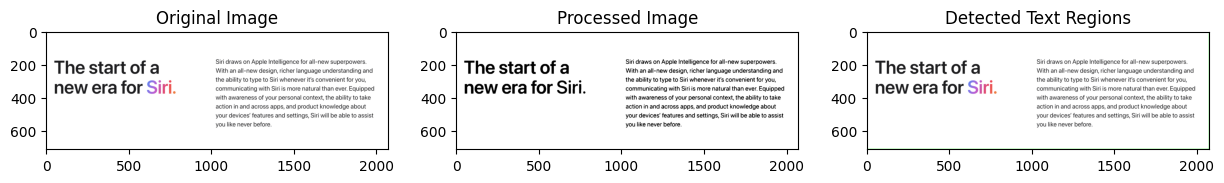

Extracted Text:
 The start of a
new era for Siri.

Siri draws on Apple Intelligence for all-new superpowers.
With an all-new design, richer language understanding and
the ability to type to Siri whenever it's convenient for you,
communicating with Siri is more natural than ever. Equipped
with awareness of your personal context, the ability to take
action in and across apps, and product knowledge about
your devices’ features and settings, Siri will be able to assist
you like never before.



In [8]:
# Example Usage
image_path = "Apple.jpg"  # Replace with your image file path
text, original, processed = extract_text(image_path)
detected = detect_text_regions(image_path)
display_images(original, processed, detected)

print("Extracted Text:\n", text)